# Implementando algoritmo de Árvore de decisão na base de dados Íris

In [105]:
# Importando o íris e o pandas para modelagem da base de dados

import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()
base = pd.DataFrame(data=iris.data, columns=iris.feature_names)
base['Target'] = iris.target

# Separando dados em apenas duas dimensões para melhor visualização dos dados
display(base.columns)
base1 = base[['petal length (cm)', 'petal width (cm)', 'Target']].loc[base['Target'].isin([1,2])]

display(base1)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

,petal length (cm),petal width (cm),Target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


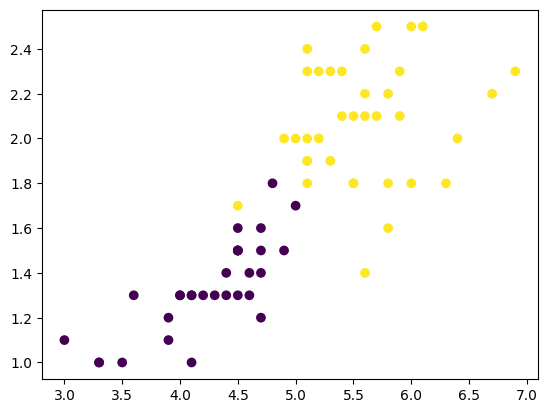

In [106]:
# Definindo variáveis de treino

x_treino = base1.drop('Target', axis=1)
y_treino = base1['Target']

# Importanto arquivos de teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_treino, y_treino, test_size=0.33, random_state=42)

# Representando dados

import matplotlib.pyplot as plt

grafico = plt.scatter(x_treino['petal length (cm)'], x_treino['petal width (cm)'], c=y_treino)

Score do modelo: 1.0



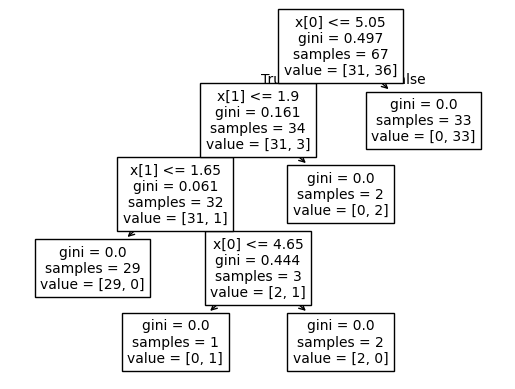

In [107]:
# Treinando modelo de Árvore de decisão

from sklearn import tree

arvore = tree.DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

print(f'Score do modelo: {arvore.score(x_treino, y_treino)}\n')

tree.plot_tree(arvore);

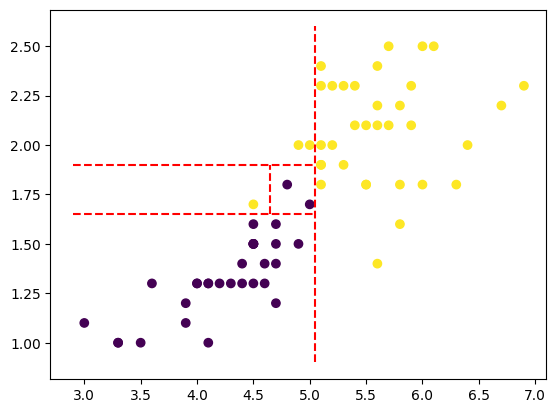

In [108]:
# Exibindo tomada de decisão do modelo
fig, ax = plt.subplots()
ax.scatter(x_treino['petal length (cm)'], x_treino['petal width (cm)'], c=y_treino)

ax.plot([5.05, 5.05], [0.9, 2.6], '--r')
ax.plot([2.9 ,5.05], [1.9, 1.9], '--r')
ax.plot([2.9 ,5.05], [1.65, 1.65], '--r')
ax.plot([4.65, 4.65], [1.65, 1.9], '--r')

fig.show()

In [109]:
# Analisando modelo

y_pred = arvore.predict(x_teste)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, y_pred))

[[18  1]
 [ 6  8]]


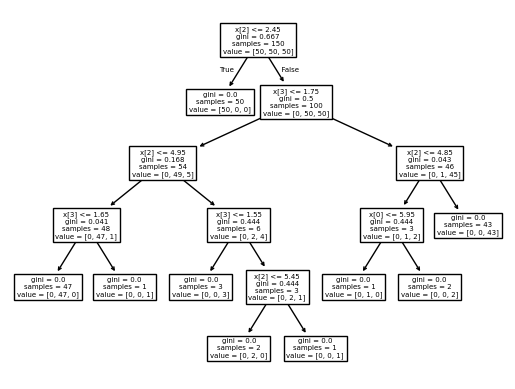

In [115]:
# Realizando treinamento agora para a base toda

x_treino = base.drop('Target', axis=1)
y_treino = base['Target']

arvore2 = tree.DecisionTreeClassifier()
arvore2.fit(x_treino, y_treino)

tree.plot_tree(arvore2);

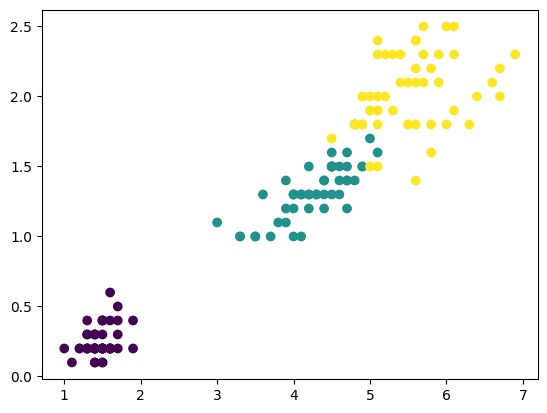

In [116]:
# Visualizando dados

fig, ax = plt.subplots()
ax.scatter(x_treino['petal length (cm)'], x_treino['petal width (cm)'], c=y_treino)

fig.show()

In [121]:
# Exibindo score do modelo

print(f'Score do modelo: {arvore2.score(x_treino, y_treino)}\n')

y_pred2 = arvore2.predict(x_treino)

from sklearn.metrics import confusion_matrix

print(f'Matrix de confusão: \n{confusion_matrix(y_treino, y_pred2)}')


Score do modelo: 1.0

Matrix de confusão: 
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
